import the important backages 

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


read data

In [19]:
path =  r'D:\data science\datasets\pet\images'

do preprocessing on images by ImageDataGenerator

`data = ImageDataGenerator ( `


>rescale,->(if image  rescale to 0,1 instead of 0,255)`

 >rotation_range,->(support data veration, rotate data -20 ,20 degree)`
 
 
  >width_shift_range ->(This allows the image to be shifted horizontally by a random amount up to 20%  )`
  
  
   >height_shift_range,->(This allows the image to be shifted vertically by a random amount up to 20% )`
   
   
 >shear_range,->(This applies a random shear transformation (distortion or tilt) to the image. Shearing means changing the angle of the image)(bt4awahh el image 4oayaa)
    
    
>zoom_range,->(This applies a random zoom in or out on the image by up to 20%)`
    
    
>horizontal_flip,validation_split -> (if true , This means the images will be randomly flipped horizontally)`
     
     
>validation_split -> (split data in to train and validation set 0.2 means 20% of data will be used for validation)`

     ):
>do things that will implement on tha data at the path that i will send

In [33]:
data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
    )

i will split data into training and testing(validation) sets

`use the generator (what is come from ImageDataGenerator)`


`and implement flow_from_directory `


`flow_from_directory( directory(my path to my data), target_size=(224, 224), batch_size=64, class_mode='categorical',subset='training')`


`target_size -> size of each data i want to assigen (h,w)`


`batch_size ->num of parts(set of images) i want to use in each iteration`


`class_mode ->'categorical' represent that the data is categorical data`


`(binary , categorical, sparse, integer, float, etc.)`


`subset -> 'training' or 'validation'`

split to train

In [8]:
train_data = data.flow_from_directory (
    path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset = 'training'
)

Found 5913 images belonging to 2 classes.


split to validation

In [9]:
test_data = data.flow_from_directory (
    path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset = 'validation'
)

Found 1477 images belonging to 2 classes.


`MobileNetV2 this is model in deep learning for feature extraction`


`model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))`


`weights = 'imagenet' ->  Loads the weights of the model pre-trained on the ImageNet dataset. This provides a strong foundation for feature extraction.`
>because ImageNet dataset is a large dataset of images with 14 million images and 21,841 categories, so it is a good dataset for pre-training a model for feature extraction.


`include_top=False ->  This argument is used to include or exclude the classification head of the model`


`input_shape=(224, 224, 3) ->  Specifies the input shape of the model, which is 224x224 pixels with 3 color channels (RGB).`



extract_model.trainable = False : freeze the weights of the model


In [10]:
extract_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
extract_model.trainable = False # freeze the layers(whights) to prevent overfitting 

In [11]:
def feature_extraction (data , extract_model):#extract_model-->MobileNetV2 model
    feats = []
    labels = []
    for x_batch , y_batch in data:
        feat_batch = extract_model.predict(x_batch) # implement the model on each patch
        feats.append(feat_batch)
        labels.append(y_batch)
        if len(feats) >= len(data):
            break
    return np.vstack(feats), np.vstack(labels)

In [12]:
x_train , y_train = feature_extraction(train_data,extract_model)
x_test , y_test = feature_extraction(test_data,extract_model)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 903ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 870ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 841ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 788ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 849ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 793ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 824ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 944ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 880ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 787ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 803ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 866ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 781ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 863ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 892ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 806ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 866ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 886ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 879ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 923ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 910ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 772ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 836ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 965ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 

`Flatten the features`


In [39]:
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

`implement the KNN model`

In [40]:
k = 5
knn = KNeighborsClassifier (n_neighbors = k ,metric = 'minkowski',p=2) # to perform euclidean
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [42]:
y_pred = knn.predict(X_test)

In [46]:
print("Shape of y_test:", y_test.shape)
print("Example of y_test:", y_test[:5])

print("Shape of y_pred:", y_pred.shape)
print("Example of y_pred:", y_pred[:5])


Shape of y_test: (1477, 2)
Example of y_test: [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Shape of y_pred: (1477, 2)
Example of y_pred: [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


y_test and y_pred  both have the same shape which is One-Hot Encoding

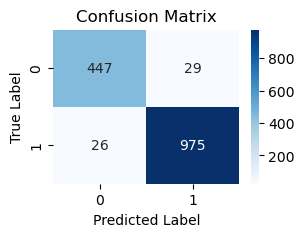

In [48]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(3,2))
sns.heatmap(cm,fmt = 'd',annot =True,cmap = 'Blues', xticklabels=range(2), yticklabels=range(2))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       476
           1       0.97      0.97      0.97      1001

    accuracy                           0.96      1477
   macro avg       0.96      0.96      0.96      1477
weighted avg       0.96      0.96      0.96      1477



In [49]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

0.962762356127285

## if you want to input a new image and know what is it 

step 1:

In [4]:
from IPython.core.display import display, HTML
display(HTML('<table>implement the preprocessing on image</table><tr><td>1.path of image</td></tr><tr><td>2 and 3.resize image (from tensorflow.keras.preprocessing.image import load_img, img_to_array)</td></tr><tr><td>4.add batch dimension by using (np.expand_dims(arr,axis = position)) -> this is add new dimensional by add new group to this dimension -> this is important if you want to use this image in models in tensorflow and keras</td></tr><tr><td>5.Rescale if your model expects scaled input</td></tr></table>'))

C:\Users\yarah\AppData\Local\Temp\ipykernel_17236\214985324.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


1.path of image
"2 and 3.resize image (from tensorflow.keras.preprocessing.image import load_img, img_to_array)"
"4.add batch dimension by using (np.expand_dims(arr,axis = position)) -> this is add new dimensional by add new group to this dimension -> this is important if you want to use this image in models in tensorflow and keras"
5.Rescale if your model expects scaled input



### step1
>implement the preprocessing on image


>1.path of image


>2 and 3.resize image (from tensorflow.keras.preprocessing.image import load_img, img_to_array)


>4.add batch dimension by using (np.expand_dims(arr,axis = position)) -> this is add new dimensional by add new group to this dimension -> this is important if you want to use this image in models in tensorflow and keras


>5.Rescale if your model expects scaled input

